In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
from matplotlib import pyplot as plt
import scvelo as scv
import anndata as ad
import seaborn as sns

In [2]:
sc.settings.verbosity=3
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.3 louvain==0.8.0 pynndescent==0.5.8


In [3]:
garcia = sc.read_h5ad('/home/j87832lw/mounting/oviduct/oviduct.all/garciallclustered.h5ad')

In [4]:
garcia.var_names_make_unique()

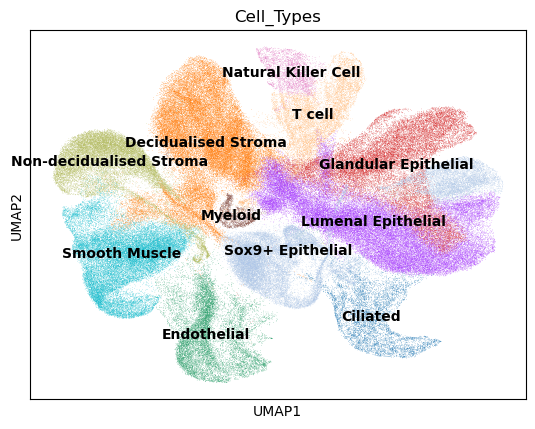

In [5]:
sc.pl.umap(garcia, color=['Cell_Types'], legend_loc='on data')

In [6]:
garciaepithelial=garcia[garcia.obs['Cell_Types'].isin(['Sox9+ Epithelial','Lumenal Epithelial','Glandular Epithelial','Ciliated']),:].copy()

In [7]:
garciaepithelial

AnnData object with n_obs × n_vars = 107949 × 2995
    obs: '10x kit', 'Batch', 'menstrual_status', 'BiopsyType', 'Day', 'DonorID', 'Location', 'SampleID', 'Stage', 'Author', 'Women age', 'Patient', 'Tissue', 'cycle_day', 'Age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Cell_Types'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Author_colors', 'Cell_Types_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

normalizing counts per cell
    finished (0:00:00)


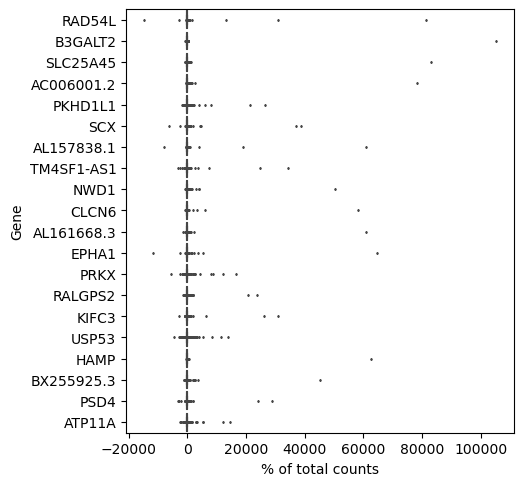

In [8]:
sc.pl.highest_expr_genes(garciaepithelial, n_top=20)

computing PCA
    on highly variable genes
    with n_comps=150
    finished (0:00:30)


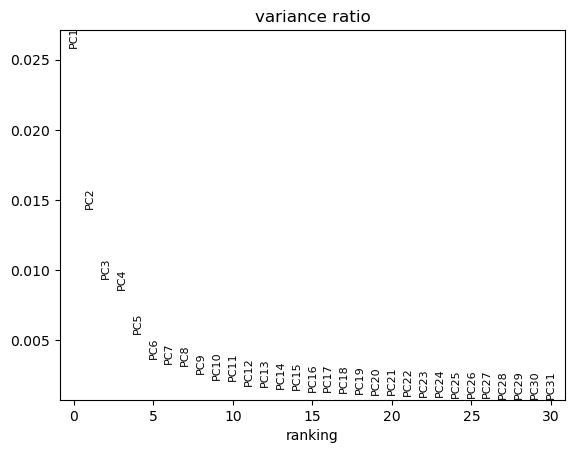

In [9]:
sc.tl.pca(garciaepithelial, svd_solver='arpack', n_comps=150)
sc.pl.pca_variance_ratio(garciaepithelial)

In [10]:
sc.pp.neighbors(garciaepithelial, n_neighbors=320, n_pcs=33)
sc.tl.leiden(garciaepithelial, resolution=2.5)

computing neighbors
    using 'X_pca' with n_pcs = 33
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:05:12)
running Leiden clustering
    finished: found 41 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:07:05)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:03)


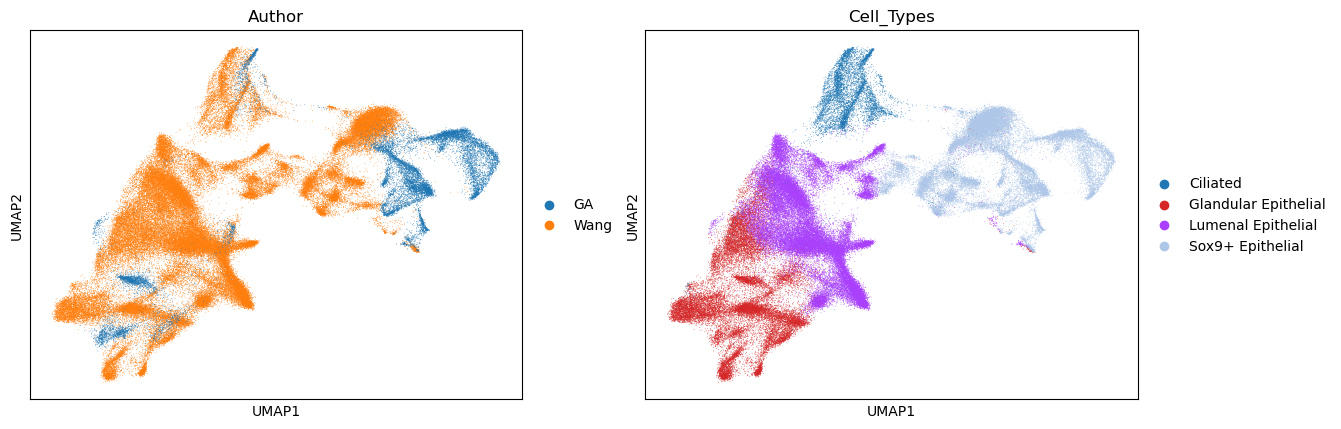

In [12]:
#pcs 32 n neighbours 320 
sc.tl.umap(garciaepithelial, min_dist=0.2, spread=0.5)
sc.pl.umap(garciaepithelial, color=['Author','Cell_Types'])

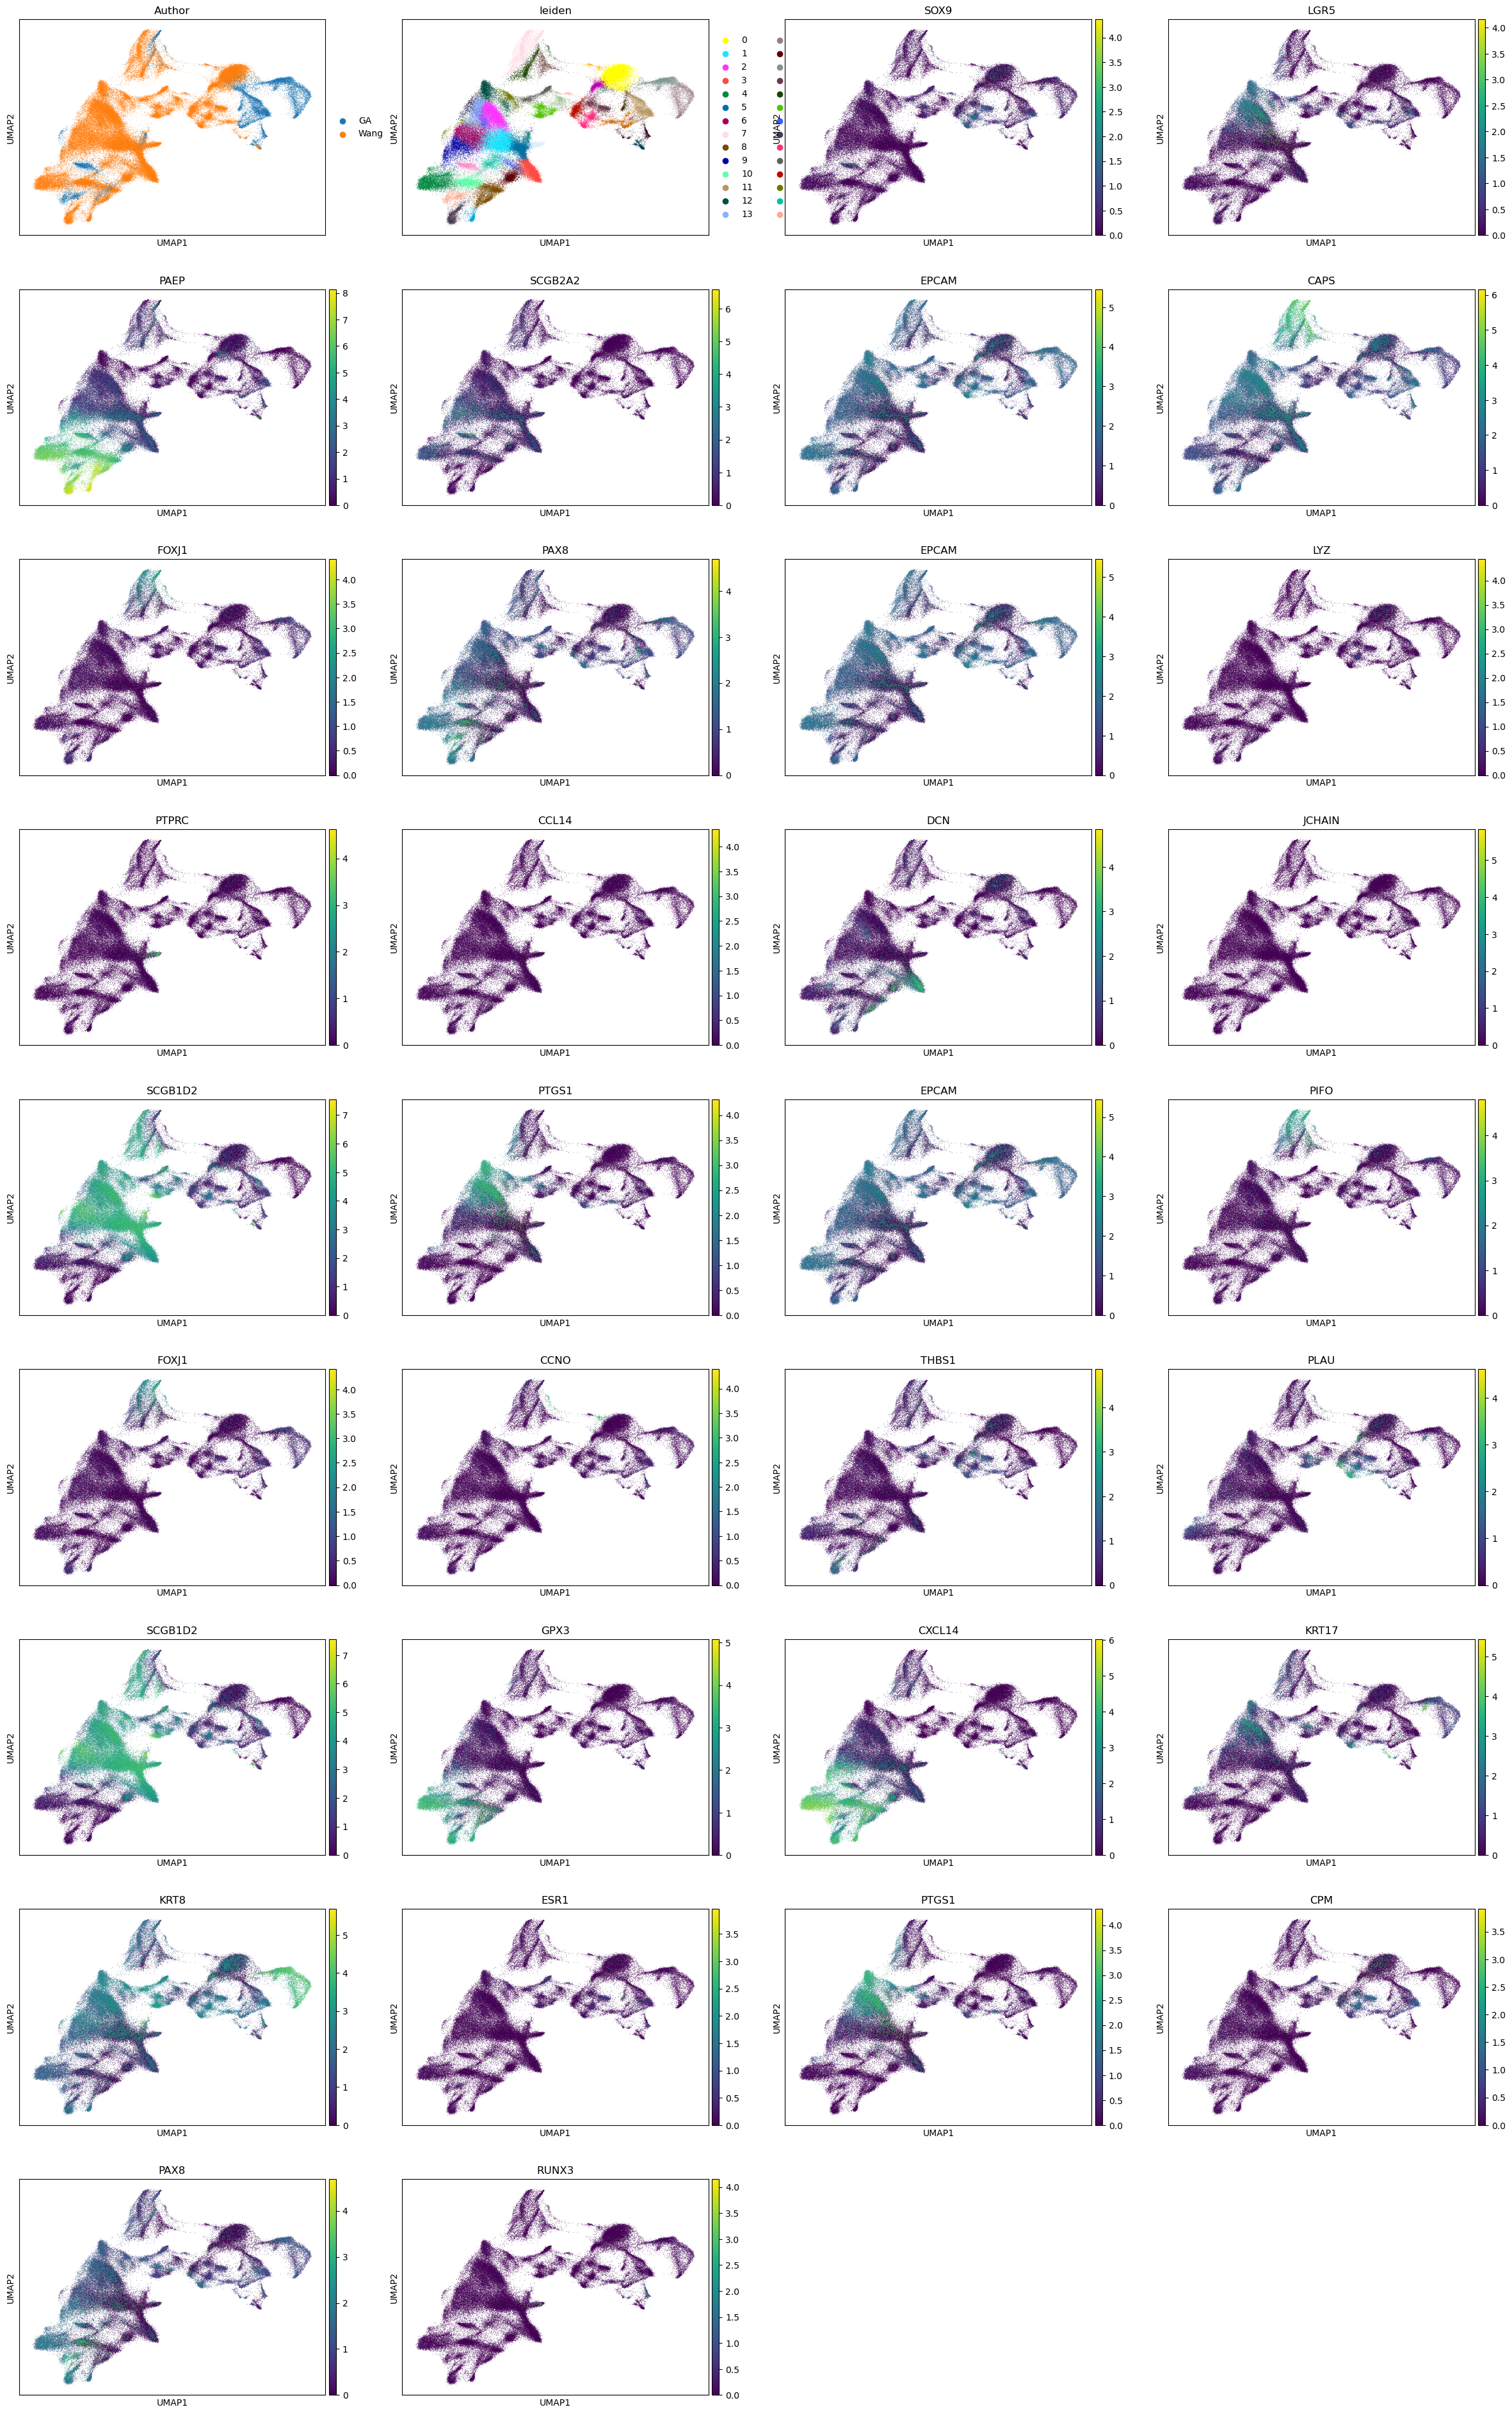

In [13]:
sc.pl.umap(garciaepithelial, color=['Author','leiden','SOX9','LGR5','PAEP','SCGB2A2','EPCAM','CAPS','FOXJ1','PAX8','EPCAM',
                          'LYZ','PTPRC','CCL14','DCN','JCHAIN','SCGB1D2','PTGS1', 
                          'EPCAM','PIFO','FOXJ1','CCNO','THBS1','PLAU',
                'SCGB1D2','GPX3','CXCL14','KRT17','KRT8','ESR1','PTGS1','CPM','PAX8','RUNX3'])

In [14]:
cell_types = {'Ciliated':['7','18','33'],
            'SOX9+':['22','17','11','30','35'],
              'Glandular Epithelial':['28','9','6','4'],
              'Luminal Epithelial':['32','13','2','12','25','23'],
              'Glandular Secretory': ['36','21','8','27','10'],
              'SOX9+ LGR5+':['24','19'],
              'Other':['0','1','3','5','14','15','16','20','26','27','29','31','34','35','37','38','39','40']}

In [15]:
garciaepithelial.obs['Cell_Types'] = np.nan

In [16]:
for i in cell_types.keys():
    ind = pd.Series(garciaepithelial.obs.leiden).isin(cell_types[i])
    garciaepithelial.obs.loc[ind,'Cell_Types'] = i

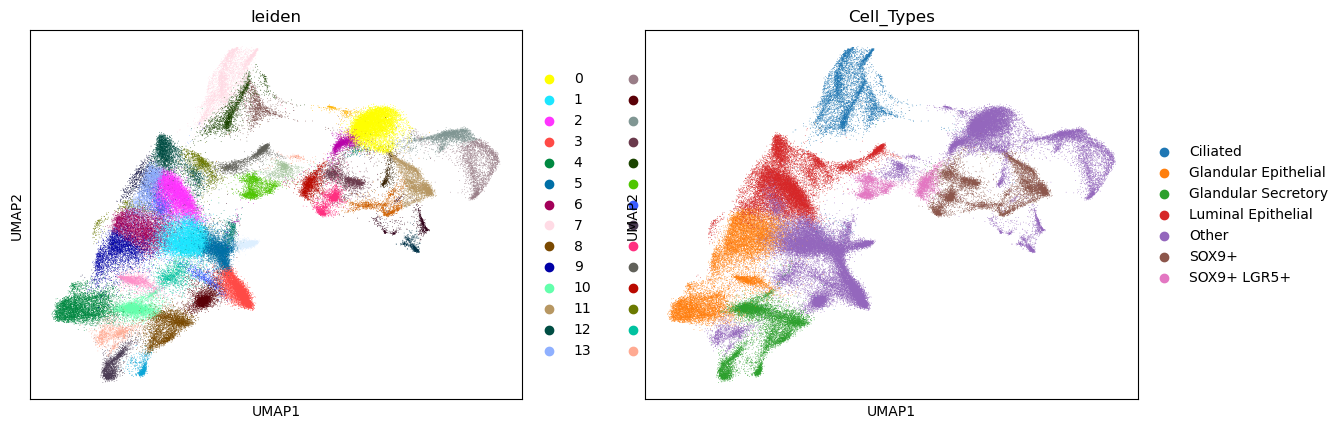

In [17]:
sc.pl.umap(garciaepithelial, color=['leiden', 'Cell_Types'])

In [18]:
garciaepithelial=garciaepithelial[garciaepithelial.obs['Cell_Types'].isin(['Ciliated','SOX9+','Glandular Epithelial','Luminal Epithelial','Glandular Secretory','SOX9+ LGR5+']),:].copy()

In [19]:
epithelial_celltypes = {'Ciliated (endometrial)':['22'],
              'Ciliated LGR5+':['13'],
              'Pre-Ciliated':['16'],
            'SOX9+ LGR5+':['29'],
              'SOX9+ LGR5-':['26','25','27','21','9'],
              'Proliferative SOX9+':['17'],
              'Glandular':['14','4','1'],
              'Lumenal 1':['0','5','23','7','8','30','31','12'],
              'Lumenal 2':['20'],
              'Lumenal 3':['28','12'],
              'Glandular Secretory': ['33','3','6','15','32','19','34','2','10','18'],
              'Other/EPCAM-':['11','24']}

In [20]:
garciaepithelial.obs['epithelial_celltypes'] = np.nan

In [21]:
for i in epithelial_celltypes.keys():
    ind = pd.Series(garciaepithelial.obs.leiden).isin(epithelial_celltypes[i])
    garciaepithelial.obs.loc[ind,'epithelial_celltypes'] = i

In [22]:
garciaepithelial=garciaepithelial[garciaepithelial.obs['Cell_Types'].isin(['Ciliated','Ciliated LGR5+','Pre-Ciliated','SOX9+ LGR5+','SOX9+ LGR5-','Proliferative SOX9+','Glandular','Lumenal 1','Lumenal 2','Lumenal 3','Glandular Secretory']),:].copy()

In [24]:
results_file = '/home/j87832lw/oviduct/oviduct.all/endometrialepithelialclustering.h5ad'
garciaepithelial.write(results_file)
garciaepithelial = sc.read_h5ad('/home/j87832lw/oviduct/oviduct.all/endometrialepithelialclustering.h5ad')

computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:11)
running Leiden clustering
    finished: found 30 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:48)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:07)
--> added 'pos', the PAGA positions (adata.uns['paga'])


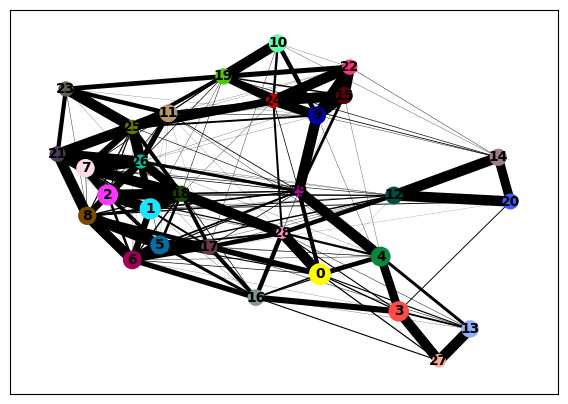

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:16)


/home/j87832lw/miniconda3/envs/velocity_analysis_pipeline/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


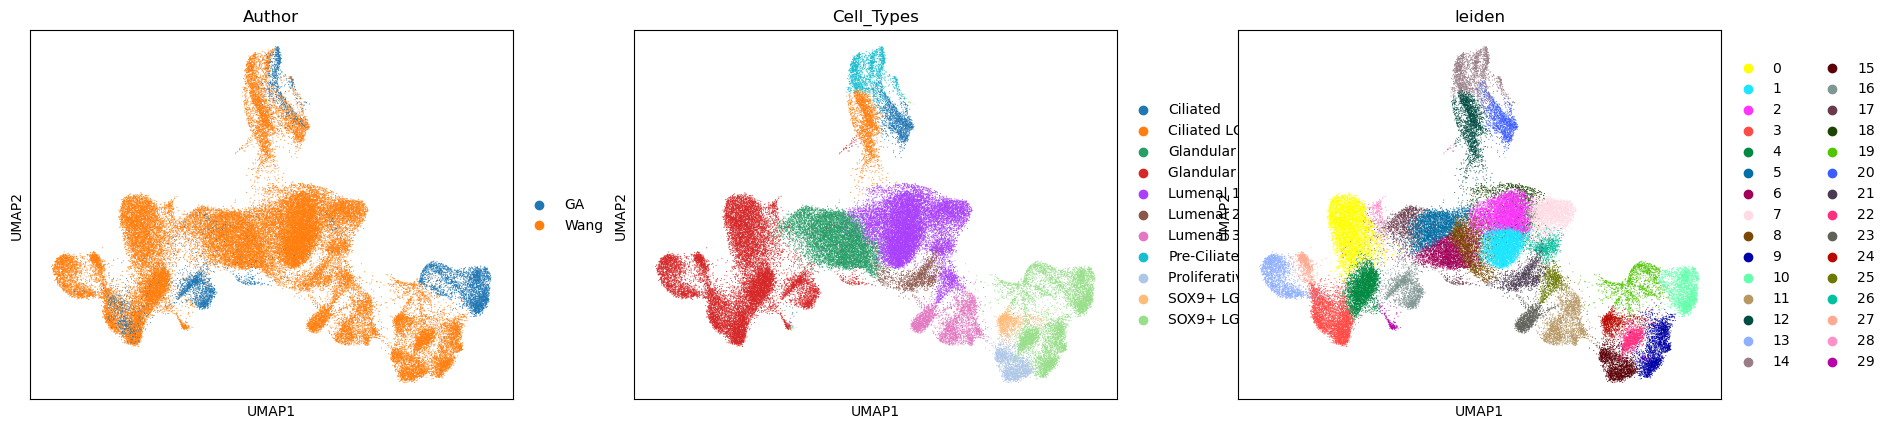

In [101]:
sc.pp.neighbors(garciaepithelial, n_neighbors=200, n_pcs=25)
sc.tl.leiden(garciaepithelial, resolution = 2)
sc.tl.paga(garciaepithelial)
sc.pl.paga(garciaepithelial)
sc.tl.umap(garciaepithelial)
sc.pl.umap(garciaepithelial, color=['Author','Cell_Types','leiden'])

/home/j87832lw/miniconda3/envs/velocity_analysis_pipeline/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


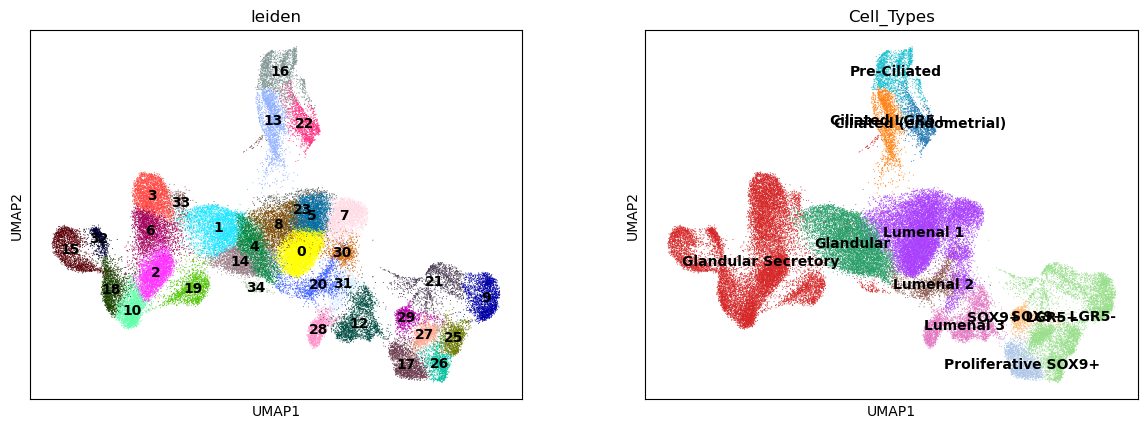

In [138]:
sc.pl.umap(garciaepithelial, color=['leiden', 'Cell_Types'], legend_loc='on data')

In [ ]:
results_file = '/home/j87832lw/oviduct/oviduct.all/endometrialepithelialclusteringfinalforconcat.h5ad'
garciaepithelial.write(results_file)